# Homework 3 - Kadir Berat YILDIRIM - 090150122

## Poisson and Gaussian Distributions

- **Poisson Process and Distribution:**

The poisson process is widely used in data science. It relates the time needed to be taken for occurance of another event where events have no relationship between each other, with a probability distribution. For example, the number of car accidents in an area can be described as poisson process. The time taken after one accident is random and more importantly, one accident does not effect the beginning of the other one. This means they are independent processes but, as it seems to be, at a certain rate. 

Poisson process is discrete while gaussian process is continuous.

In other words, the poisson process gives a probability of an event to happen after another event. A physics example for this process is photons landing on a photodiode. Electrons are excited randomly so one release of energy (or photon) from cathode side is independent of another one, which results in photons randomly hitting anode side of the photodiode. In a time interval, there will generally be specific number of photons that have landed on photodiode. 

*The number of events counted with constant likelihood in a specific time interval is said to be **Poisson Process**, which follows **Poisson Distribution**. *

Another great example is the IceCube Project. IceCube Project's website defines the projects purpose as follows:
*Encompassing a cubic kilometer of ice, IceCube searches for nearly massless subatomic particles called neutrinos. These high-energy astronomical messengers provide information to probe the most violent astrophysical sources: events like exploding stars, gamma-ray bursts, and cataclysmic phenomena involving black holes and neutron stars.*
Since neutrinos enter Earth's atmosphere randomly, they will be randomly collected by IceCube's devices. Here, the word randomly does not mean that the time interval between events changes dramatically; but, again, there is no obvious relation between one event and another. So this process also follows Poisson. 

We will be working on IceCube's IC86c data taken from their website for visualization and analysis of Poisson Distribution and Gaussian Distribution.

- **Gaussian Process and Distribution:**

Gaussian Distribution represents normal deviation of real-valued random variables whose distributions are not known. Its width grows as standard deviation gets bigger, which gives visual information about sigma value, or in other words, how spread out the data we have in our hands. Gaussian (or normal distribution) is also called a *Bell Curve*, however there are other distributions that are also bell-shaped. 

As explained in wikipedia page: *Physical quantities that are expected to be the sum of many independent processes (such as measurement errors) often have distributions that are nearly normal.* 

An example can be given as follows: Imagine in a company, supervisors are graded in performance each year. If this company decides to use Gaussian Process as grading method:

    * 10% must be graded poor
    * 20% must be graded bad
    * 40% must be graded normal
    * 20% must be graded good
    * 10% must be graded excellent
    
This kind of distribution is based on the mean, so the mean of performance of these supervisors decide the 'normal' range, and other supervisors are compared based on their distance to the mean. 

The middle of the *bell* of Gaussian Distribution is the mean. Its width stands for standard deviation of the data. 

- **Python Code:**

As for our imports, we will be using Python's *Scipy* library as it contains methods for both Poisson and Normal (Gaussian) Distributions.

In [1]:
import scipy.stats as stats

For numerical methods and constants, we import *numpy* library. And for reading the data set, we import *pandas* library.

In [2]:
import numpy as np
import pandas as pd

Finally, for plotting, *matplotlib* library is imported.

In [3]:
import matplotlib.pyplot as plt

Reading the data set is done via *pandas* with a simple command. Then the data which is needed to be plotted is taken into a variable. Here we use one column as an example, later on, other columns will be analyzed.

In [4]:
dataset = pd.read_csv('IC86c_data.csv')
Dec_deg_data = dataset['Dec_deg']

For Poisson and Gaussian Distributions, mean value (mu) and standard deviation (std) is needed to be calculated. Pandas has both of them as methods inside DataFrame class.

In [6]:
mu = Dec_deg_data.mean()
sigma = Dec_deg_data.std()
print('mu: ', mu, 'sigma: ', sigma)

mu:  5.677225042301184 sigma:  1.5031404690211452


Then here on, it is easy to calculate and plot Poisson and Gaussian Distributions. Starting with Gaussian:

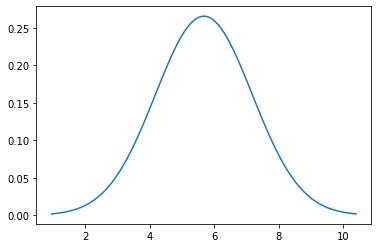

In [7]:
x1 = np.linspace(mu - np.pi*sigma, mu + np.pi*sigma, 100)
plt.plot(x1, stats.norm.pdf(x1, mu, sigma))

plt.show()

Of course for beautification, plot titles and labels as well as legends can be added. For simplification here, only the gaussian is plotted.

*Scipy*'s method *norm* is used as *stats.norm.pdf(x1, mu, sigma)* as can be seen above. Mean was calculated as around 5.68 and from the plot, we can easily see that the 'Bell' of the Gaussion is at that value, which stands for mean. 

Plotting the Poisson Distribution has a similar logic begind it.

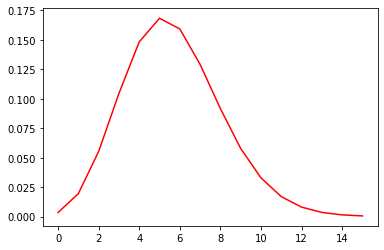

In [8]:
p1 = stats.poisson(mu)
n = 15
x2 = np.linspace(0,n,n+1) 
pmf1 = np.array([p1.pmf(i) for i in x2])
plt.plot(x2, pmf1, 'r')

plt.show()

Here we also see the 'bell' is at around the mean which is expected. But also, discrete behaviour of Poisson Distribution is visible compared to Gaussian Distribution. 

- **Analyzing the Data**

As talked about before, the data used in previous example is from the IceCube Project's sensor labeled as 'IC86c' which contains data from 2015 May 18 to 2017 Oct 31. These sensors measure muons and neutrinos hitting Earth's surface at south pole. Since there is no obvious relation between one muon hitting the Earth with another one, it is fairly reasonable to assume this process should behave as a Poisson Process. We can see if that is the case by plotting our data in a Gaussian Distribution (as we already did). 

Inside the data, we have 5 columns which stand for:

    * MJD : Modified Julian Day
    * Ra_deg : Right Ascension Coordinates
    * Dec_deg : Declination Coordinates
    * Unc_deg : Angular Uncertainity (Degrees)
    * log10(Ereco) : the logarithm of the reconstructed muon energy
    
We can have a look at coordinate datas to see if they behave as a normal distribution. We have taken a look at Dec_deg column before so let us start with Ra_deg column.

If we plot Poisson and Gaussian Distributions together:

mu:  77.33402707275805 sigma:  1.444088954233914


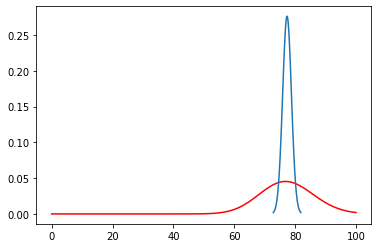

In [11]:
Ra_deg_data = dataset['Ra_deg']

mu = Ra_deg_data.mean()
sigma = Ra_deg_data.std()
print('mu: ', mu, 'sigma: ', sigma)

p1 = stats.poisson(mu)
n = 100
x2 = np.linspace(0,n,n+1) 
pmf1 = np.array([p1.pmf(i) for i in x2])
plt.plot(x2, pmf1, 'r')

x1 = np.linspace(mu - np.pi*sigma, mu + np.pi*sigma, 100)
plt.plot(x1, stats.norm.pdf(x1, mu, sigma))

plt.show()

We have a mean at around 77, which is why Gaussian is located at there. Also a small sigma reduces the width of this Gaussian plot.

Poisson Distribution shows an increase close to Gaussian and behaves in a similar way. As expected, There is a zero possibility when far away from mean, while around the mean, there is a good possibility that an event may occur. 

We can have a look at angular uncertainity data (Unc_deg) to see it also behaves in the same way.

mu:  1.0235702199661592 sigma:  0.7885022992946833


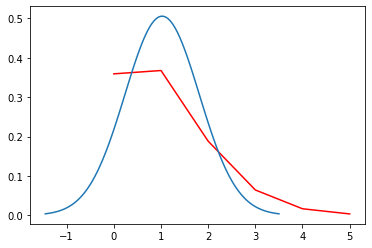

In [14]:
Unc_deg_data = dataset['Unc_deg']

mu = Unc_deg_data.mean()
sigma = Unc_deg_data.std()
print('mu: ', mu, 'sigma: ', sigma)

p1 = stats.poisson(mu)
n = 5
x2 = np.linspace(0,n,n+1) 
pmf1 = np.array([p1.pmf(i) for i in x2])
plt.plot(x2, pmf1, 'r')

x1 = np.linspace(mu - np.pi*sigma, mu + np.pi*sigma, 100)
plt.plot(x1, stats.norm.pdf(x1, mu, sigma))

plt.show()

Since this data is on angular uncertainity, it can be concluded that there is a half percent chance that we will have a 1 degree uncertainity in the measured angle of muon, based on this plot. Up to around 2 degrees uncertainity, we are still in range of 2 sigma, which would be expected. But, more than 2 degrees (or less than 0 degrees) would be more than 2 sigma, which may indicate that this specific point on our data can contain unnecessary information as it could just be an error of devices. 